<a href="https://colab.research.google.com/github/iki-sangadji/Demographic-Analysis/blob/main/demographic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read CSV file

In [2]:
df = pd.read_csv("adult.data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


How many of each race are represented in this dataset

In [4]:
race_count = df["race"].value_counts()
race_count


,count
race,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


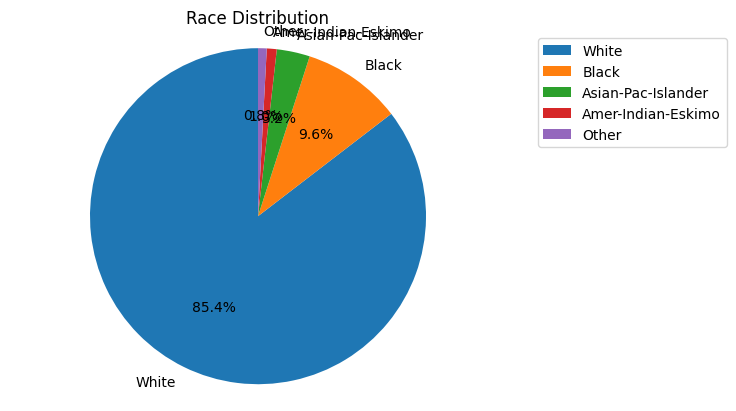

In [5]:
race_labels = race_count.index
race_values = race_count.values

plt.pie(race_values, labels=race_labels, autopct='%1.1f%%', startangle=90)
plt.title('Race Distribution')
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Average Male Age

In [ ]:
average_age_men = round(df["age"].loc[df["sex"] == "Male"].mean(), 1)
print(average_age_men)

39.4


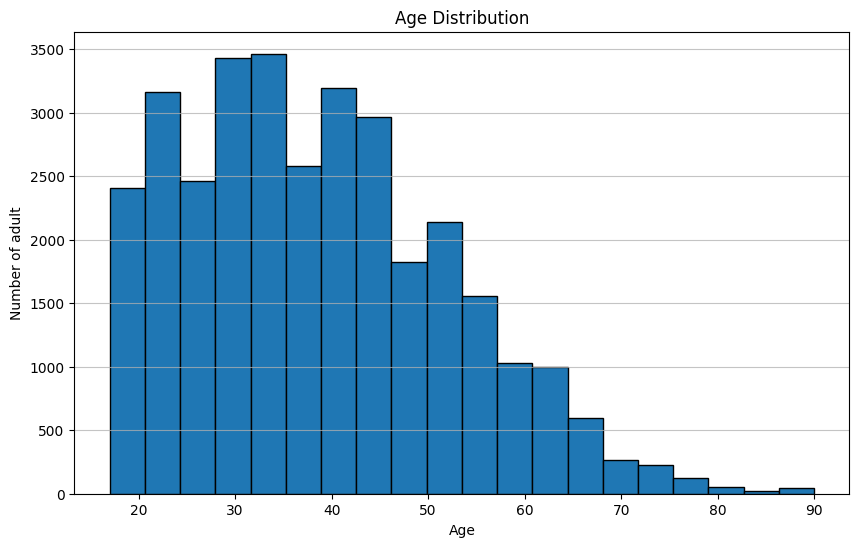

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of adult')
plt.title('Age Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()


Precentage of Bachelors Degree

In [ ]:
percentage_bachelors = (df.loc[df["education"] == "Bachelors"].shape[0] / df.shape[0]) * 100
print(round(percentage_bachelors, 1), "%")

16.4 %


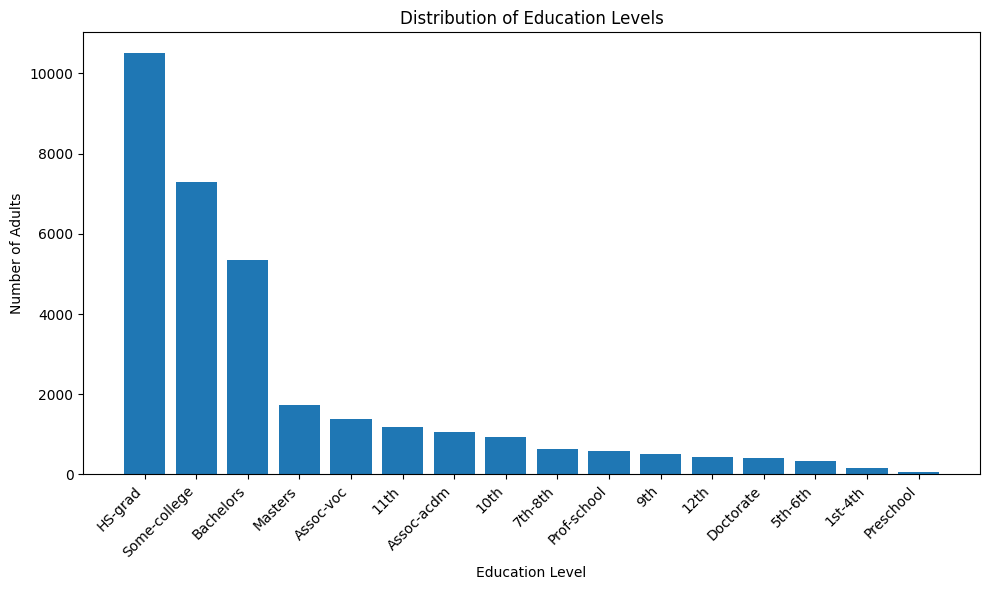

In [ ]:
education_counts = df['education'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Number of Adults')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K

In [7]:
higher_education = df.loc[df["education"].isin(["Bachelors", "Masters", "Doctorate"])]
higher_education_rich = round(((higher_education.loc[higher_education["salary"] == ">50K"].shape[0] / higher_education.shape[0])*100), 1)
print(higher_education_rich,"%")

46.5 %


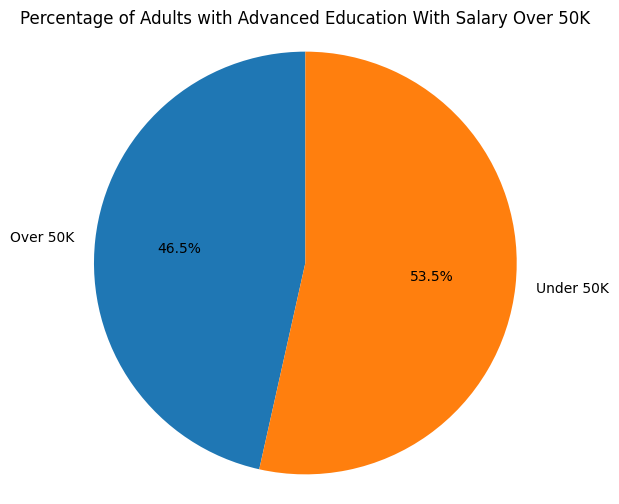

In [9]:
plt.figure(figsize=(6, 6))
plt.pie([higher_education_rich, 100 - higher_education_rich], labels=["Over 50K", "Under 50K"], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Adults with Advanced Education With Salary Over 50K')
plt.axis('equal')
plt.show()

Percentage of people without advanced education make more than 50K

In [11]:
lower_education = df.loc[~df["education"].isin(["Bachelors", "Masters", "Doctorate"])]
lower_education_rich = round((lower_education.loc[lower_education["salary"] == ">50K"].shape[0] / lower_education.shape[0] * 100),1)
print(lower_education_rich,"%")

17.4 %


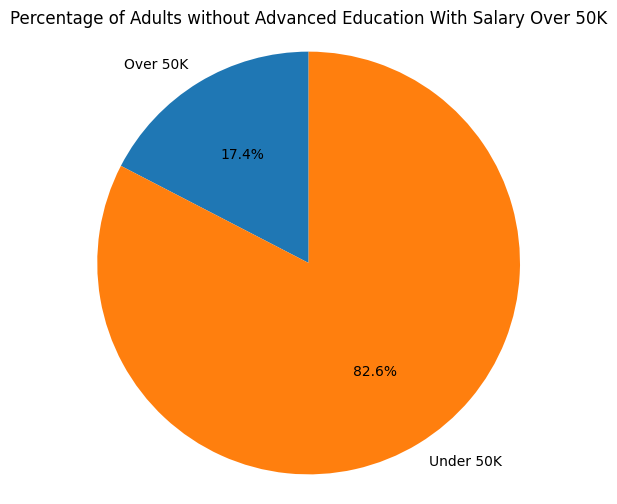

In [12]:
plt.figure(figsize=(6, 6))
plt.pie([lower_education_rich, 100 - lower_education_rich], labels=["Over 50K", "Under 50K"], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Adults without Advanced Education With Salary Over 50K')
plt.axis('equal')
plt.show()

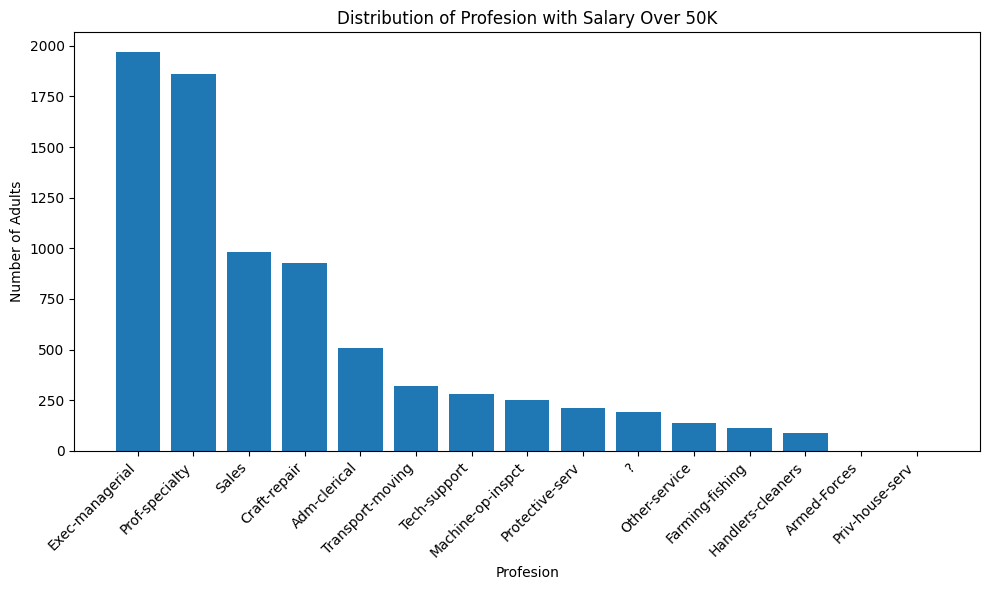

In [16]:
rich_adults = df.loc[df["salary"] == ">50K"]
rich_profesion = rich_adults["occupation"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(rich_profesion.index, rich_profesion.values)
plt.xlabel('Profesion')
plt.ylabel('Number of Adults')
plt.title('Distribution of Profesion with Salary Over 50K')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Minimum number of hours a person works per week

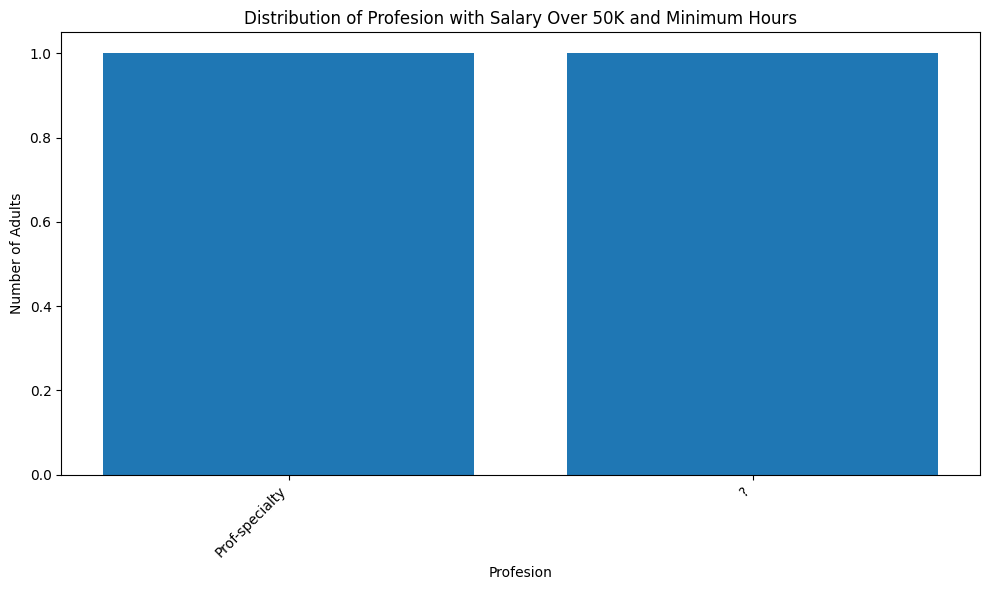

In [20]:
min_work_hours = df["hours-per-week"].min()
num_min_workers = df.loc[df["hours-per-week"] == min_work_hours]
rich_min_workers = num_min_workers.loc[num_min_workers["salary"] == ">50K"]
rich_min_profesion = rich_min_workers["occupation"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(rich_min_profesion.index, rich_min_profesion.values)
plt.xlabel('Profesion')
plt.ylabel('Number of Adults')
plt.title('Distribution of Profesion with Salary Over 50K and Minimum Hours')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()